# Advanced Cartography (Part 1)
This guide shows advanced usage of VisualVariables and other Renderer options in the Map Widget: for example, Class Break Renderers (divided in size and colors) and Unique Value Renderers. The purpose is to give users more freedom into customizing their own style or symbolizing. For previous coverage of map widgets, please go to [using the map widget](https://developers.arcgis.com/python/guide/using-the-map-widget) and [Advanced Map Widget Usage](https://developers.arcgis.com/python/guide/advanced-map-widget-useage/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Advanced-Cartography-(Part-1)" data-toc-modified-id="Advanced-Cartography-(Part-1)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Advanced Cartography (Part 1)</a></span><ul class="toc-item"><li><span><a href="#Part-1.-Style-based-on-numeric-values-in-your-data" data-toc-modified-id="Part-1.-Style-based-on-numeric-values-in-your-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Part 1. Style based on numeric values in your data</a></span><ul class="toc-item"><li><span><a href="#Section-1.1-Styled-using-only-one-numeric-attribute" data-toc-modified-id="Section-1.1-Styled-using-only-one-numeric-attribute-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Section 1.1 Styled using only one numeric attribute</a></span></li><li><span><a href="#Section-1.2-Compare-A-to-B" data-toc-modified-id="Section-1.2-Compare-A-to-B-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Section 1.2 Compare A to B</a></span></li><li><span><a href="#Section-1.3-Predominant-category-and-size" data-toc-modified-id="Section-1.3-Predominant-category-and-size-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Section 1.3 Predominant category and size</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

As usual, start by connecting to your GIS. You can use either an existing profile, or just type `GIS(url="your enterprise", username='user name', password='password')` to set up the connection.

In [1]:
from arcgis.gis import GIS

gis = GIS(
    url="https://pythonapi.playground.esri.com/portal",
    username="arcgis_python",
    password="amazing_arcgis_123",
)

## Part 1. Style based on numeric values in your data

The Map Viewer gives you control over styling elements such as color ramps, line weights, transparency, and symbols. Let's begin with several styling options useful for visualizing features according to numeric values in your data.

In [ ]:
map1 = gis.map("Midwest")
map1

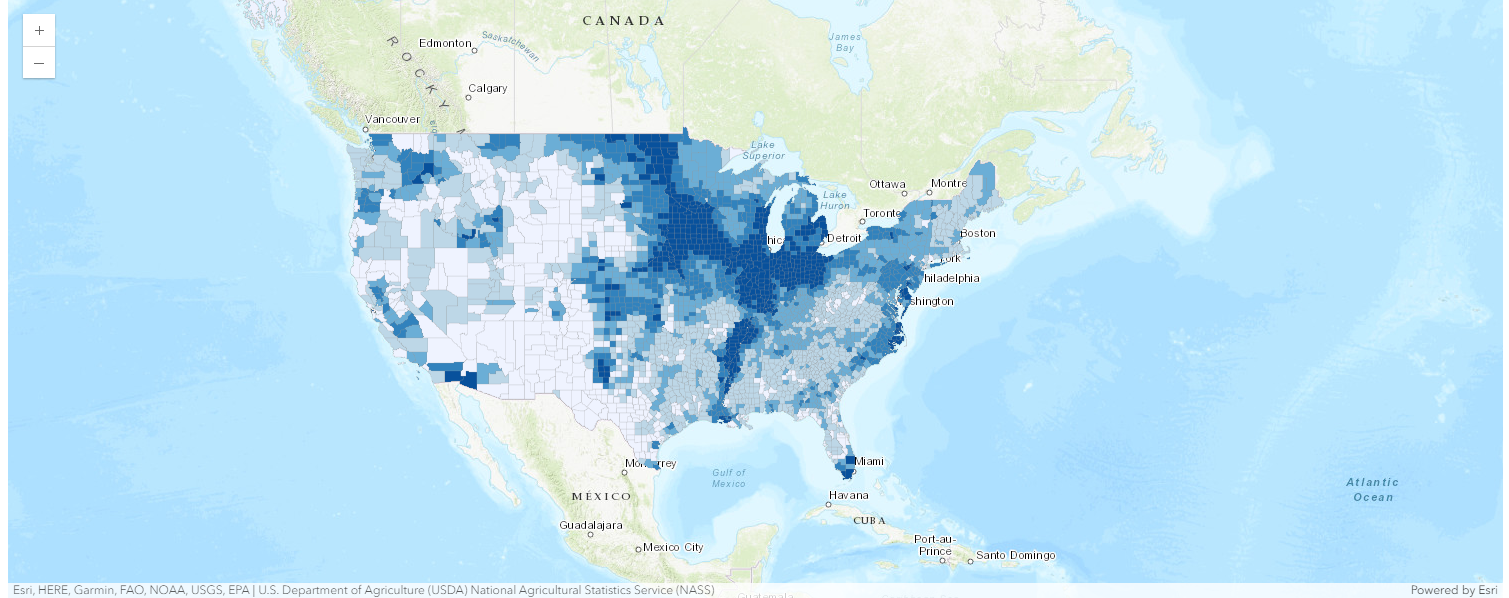

### Section 1.1 Styled using only one numeric attribute

If you have numeric data, you may want to distinguish features using graduated colors to reflect a count or an amount. Different kinds of color ramps can be used—for example, a simple light-to-dark color ramp is good for showing low-to-high data values such as age, income, or ratio. Color ramps like this can be applied to points, lines, or polygons. Let's use a light-to-dark color ramp to represent the ratio of cropland area to general land area from low to high by county. More documentation can be found in [Style numbers](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_1D8BD412F83148C6ABF315CA10111E66).

In [3]:
"""
    # only 1 numeric attribute
    # (a) to visualize with counts and amounts (color)
    # field_name here represents "The acres of total cropland as a percentage of land area in acres"
"""

from arcgis.layers import Service

usa_flayer = Service(
    "https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0"
)

map1.content.add(usa_flayer)

In [4]:
renderer_manager = map1.content.renderer(0)
smart_mapping_manager = renderer_manager.smart_mapping()
smart_mapping_manager.class_breaks_renderer(break_type="color", field="M086_07")

While smart mapping will automatically choose the class breaks, users can also use dataclasses if they want finer control by providing their own class breaks and symbology for each class. By creating dataclasses for any renderer, you are directing Python to allow the Javascript API to use the renderer created from the webmap specifications. Since Python sends the map's json directly to JavaScript, you can specify any Javascript Renderer for a large range of visualization options! Please look at the example of `map2` below to explore how to provide your own customized class breaks data and specific symbols with color, size, labels, etc.

In [ ]:
"""
    # only 1 numeric attribute
    # (a) to visualize with counts and amounts (color) + Customized class breaks
    # field_name here represents "The acres of total cropland as a percentage of land area in acres"
"""

from arcgis.map.renderers import (
    ClassBreaksRenderer,
    ClassBreakInfo,
    SizeInfoVisualVariable,
)
from arcgis.map.symbols import SimpleLineSymbolEsriSLS, SimpleFillSymbolEsriSFS

map2 = gis.map("Midwest")
usa_flayer = Service(
    "https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0"
)

# Define the class breaks with proper data classes
class_break_infos = [
    ClassBreakInfo(
        class_max_value=10,
        label="< 10%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [237, 248, 251, 204],  # Light greenish color
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=39.5,
        label="10% - 39.5%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [178, 226, 226, 204],  # Slightly darker green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=54,
        label="39.5% - 54%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [102, 194, 164, 204],  # Medium green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=68,
        label="54% - 68%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [44, 162, 95, 204],  # Dark green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
    ClassBreakInfo(
        class_max_value=100,
        label="> 68%",
        symbol=SimpleFillSymbolEsriSFS(
            **{
                "type": "esriSFS",
                "style": "esriSFSSolid",
                "color": [0, 109, 44, 204],  # Darkest green
                "outline": {"color": [153, 153, 153, 255], "width": 0.375},
            }
        ),
    ),
]

# Create the ClassBreaksRenderer using the new dataclass structure
class_breaks_renderer = ClassBreaksRenderer(
    field="M086_07",
    class_break_infos=class_break_infos,
    normalization_type=None,  # Change to 'esriNormalizeByField' if you want normalization
)


# Add the layer to the map and visualize
map2.content.add(usa_flayer, drawing_info={"renderer": class_breaks_renderer.dict()})
map2

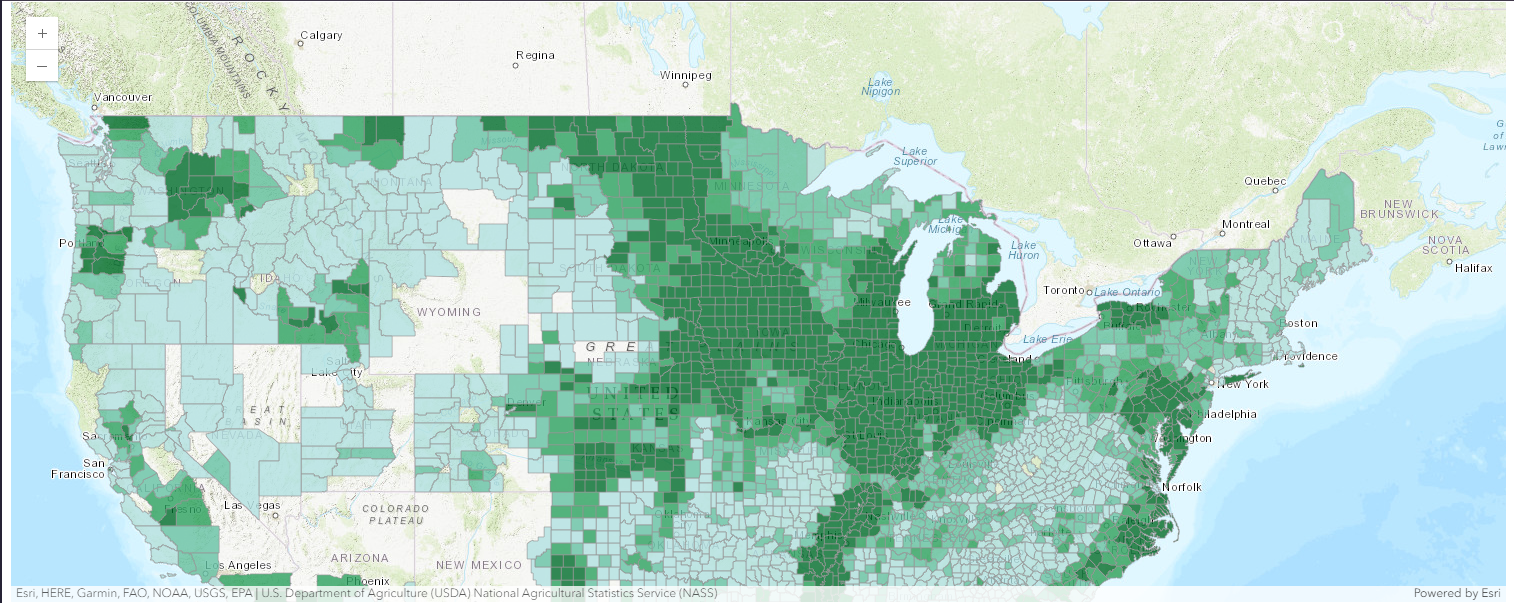

The two examples shown above demonstrate how color differences in visualization can help the audience understand the orderable sequence of the numeric data in its different bins. Alternatively, size differences also play an important role in mapping. 

The map style (as shown below) uses an orderable sequence of different sizes to represent your numeric data or ranked categories. Points, lines, and areas can all be drawn using this approach. Polygon features are displayed as proportional points over polygons. These proportional symbol maps use an intuitive logic that larger symbols equate to larger numbers. Adjust the size of the symbols to clarify the story you’re telling. More documentation can be found in [Counts and Amounts (Size)](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_1D8BD412F83148C6ABF315CA10111E66)

In [ ]:
"""
    # only 1 numeric attribute
    # (b) counts and amounts (size)
    # The field used here represent the harvested acres of Upland Cotton
"""

from arcgis.map.symbols import (
    SimpleFillSymbolEsriSFS,
    SimpleLineSymbolEsriSLS,
    SimpleMarkerSymbolEsriSMS,
)
from arcgis.map.renderers import Size, AuthoringInfo


map3 = gis.map("Midwest")

visual_variables = [
    SizeInfoVisualVariable(
        field="M050_07",
        max_data_value=2638797.16,
        max_size=Size(
            **{
                "stops": [
                    {"size": 60.0, "value": 1128.0},
                    {"size": 60.0, "value": 28889.0},
                    {"size": 37.5, "value": 15545075.0},
                    {"size": 37.5, "value": 591657528.0},
                ],
                "type": "sizeInfo",
                "valueExpression": "$view.scale",
            }
        ),
        min_data_value=0.0,
        min_size=Size(
            **{
                "stops": [
                    {"size": 12.0, "value": 1128.0},
                    {"size": 12.0, "value": 28889.0},
                    {"size": 3.0, "value": 15545075.0},
                    {"size": 3.0, "value": 591657528.0},
                ],
                "type": "sizeInfo",
                "valueExpression": "$view.scale",
            }
        ),
        type="sizeInfo",
        value_unit="unknown",
    ),
    SizeInfoVisualVariable(
        stops=[
            {"size": 2.0, "value": 1080478.0},
            {"size": 1.0, "value": 6752990.0},
            {"size": 1.0, "value": 27011958.0},
            {"size": 0.0, "value": 54023916.0},
        ],
        target="outline",
        type="sizeInfo",
        value_expression="$view.scale",
        value_unit="unknown",
    ),
]

auth_info = AuthoringInfo(
    **{
        "classificationMethod": "esriClassifyManual",
        "fadeRatio": 0,
        "visualVariables": [
            {
                "maxSliderValue": 2638797.16,
                "minSliderValue": 0.0,
                "referenceSizeScale": 0,
                "sizeInfoType": "referenceSize",
                "theme": "high-to-low",
                "type": "sizeInfo",
            }
        ],
    }
)

bckgrnd = SimpleFillSymbolEsriSFS(
    **{
        "color": [0, 0, 0, 0],
        "outline": {
            "color": [153, 153, 153, 64],
            "style": "esriSLSSolid",
            "type": "esriSLS",
            "width": 0.75,
        },
        "style": "esriSFSSolid",
        "type": "esriSFS",
    }
)

marker_symbol = SimpleMarkerSymbolEsriSMS(
    **{
        "angle": 0.0,
        "color": [227, 139, 79, 255],
        "outline": {
            "color": [255, 255, 255, 64],
            "style": "esriSLSSolid",
            "type": "esriSLS",
            "width": 0.75,
        },
        "size": 9.0,
        "style": "esriSMSCircle",
        "type": "esriSMS",
        "xoffset": 0.0,
        "yoffset": 0.0,
    }
)

class_breaks_infos = [
    ClassBreakInfo(**{"classMaxValue": 9007199254740991.0, "symbol": marker_symbol})
]

cbr = ClassBreaksRenderer(
    field="M050_07",
    background_fill_symbol=bckgrnd,
    class_break_infos=class_breaks_infos,
    authoring_info=auth_info,
    visual_variables=visual_variables,
    min_value=-9007199254740991.0,
    type="classBreaks",
)


map3.content.add(usa_flayer, drawing_info={"renderer": cbr.dict()})

map3

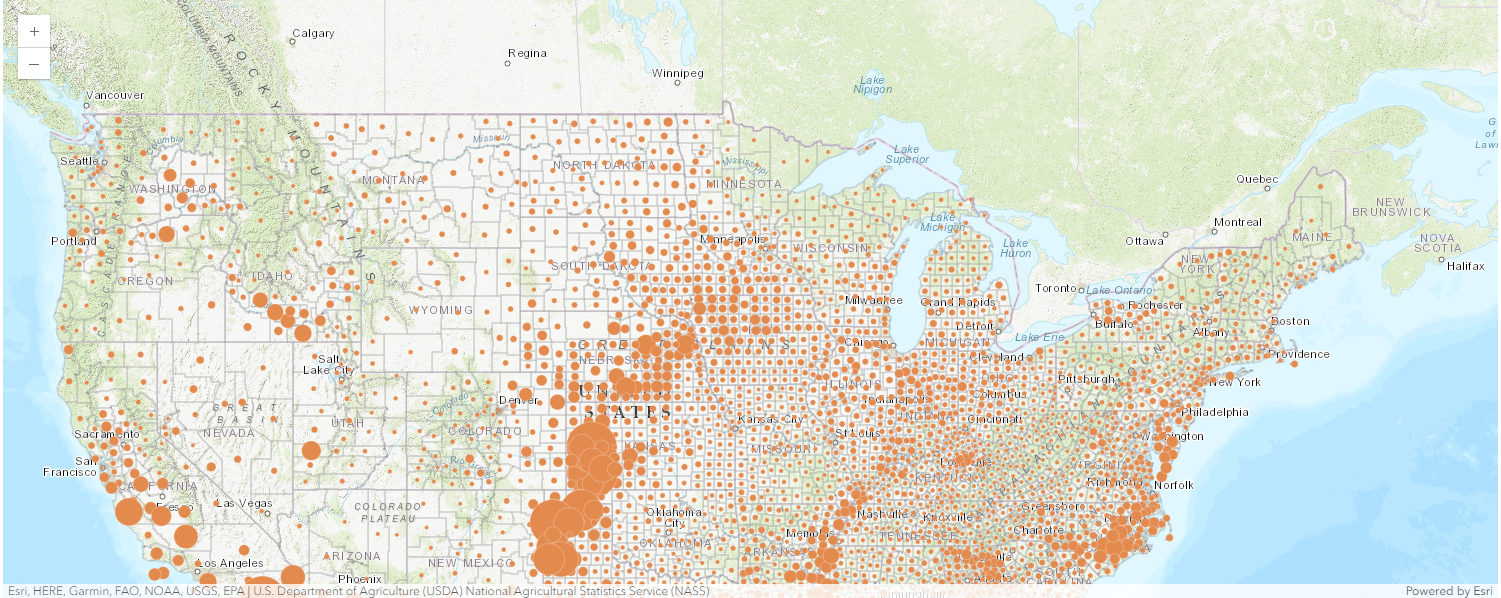

### Section 1.2 Compare A to B
This style allows you to map the ratio between two numbers and express that relationship as percentages, simple ratios, or overall percentage. For example, you can map the estimated population for 2025 as a percentage of the known population in 2015 to observe the trend of population shift. Find out more via [Compare A to B](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_F269A11801BF4CCDA1E9584B585C4671).

In [ ]:
"""
    # with 2 numeric attributes
    # compare A to B
    # The field used here represent percentage of [population of projected 2025] as pf [population of 2015]
"""

from arcgis.map.renderers import ColorInfoVisualVariable

map4 = gis.map("USA")
world_flayer = Service(
    "http://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0"
)

marker_symbol = SimpleMarkerSymbolEsriSMS(
    **{
        "color": [170, 170, 170, 255],
        "size": 10.5,
        "angle": 0,
        "xoffset": 0,
        "yoffset": 0,
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "outline": {
            "color": [153, 153, 153, 255],
            "width": 0.375,
            "type": "esriSLS",
            "style": "esriSLSSolid",
        },
    },
)
class_break_infos = [
    ClassBreakInfo(**{"symbol": marker_symbol, "classMaxValue": 9007199254740991})
]


vis_variables = [
    ColorInfoVisualVariable(
        type="colorInfo",
        field="POP2025",
        stops=[
            {"color": [242, 240, 247, 255], "value": 713000.0},
            {"color": [203, 201, 226, 255], "value": 2406044.0},
            {"color": [158, 154, 200, 255], "value": 4099089.0},
            {"color": [117, 107, 177, 255], "value": 5792133.0},
            {"color": [84, 39, 143, 255], "value": 7485178.0},
        ],
    ),
    SizeInfoVisualVariable(
        stops=[
            {"size": 10.602228516204, "value": 1155581.1085775},
            {"size": 8.481782812963202, "value": 9244648.868618},
            {"size": 4.240891406481601, "value": 73957190.9489445},
        ],
        type="sizeInfo",
        value_expression="$view.scale",
        value_unit="unknown",
    ),
]

auth_info = AuthoringInfo(
    **{
        "classificationMethod": "esriClassifyManual",
        "fadeRatio": 0,
        "visualVariables": [
            {
                "maxSliderValue": 38661000.0,
                "minSliderValue": 713000.0,
                "referenceSizeScale": 0,
                "sizeInfoType": "referenceSize",
                "theme": "high-to-low",
                "type": "colorInfo",
            }
        ],
    }
)

cbr = ClassBreaksRenderer(
    authoring_info=auth_info,
    type="classBreaks",
    field="POP2025",
    transparency=80,
    min_value=-9007199254740991,
    class_break_infos=class_break_infos,
    visual_variables=vis_variables,
)

map4.content.add(world_flayer, drawing_info={"renderer": cbr.dict()})
map4

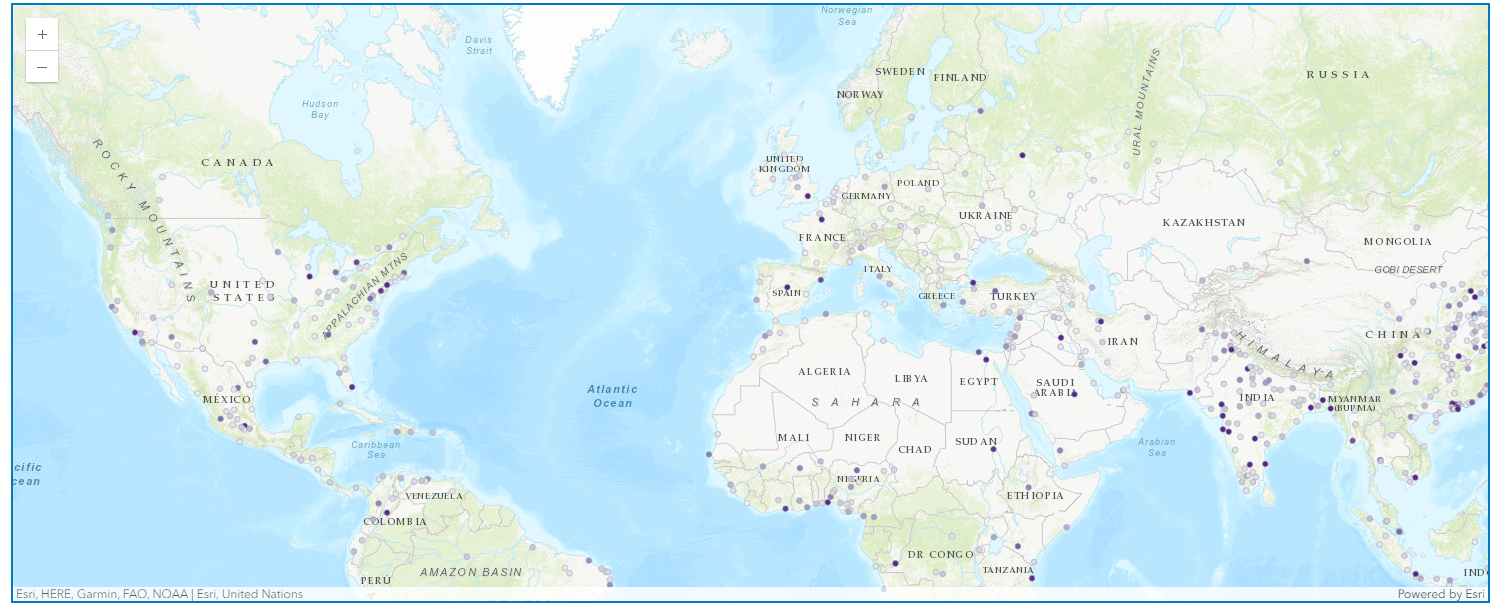

### Section 1.3 Predominant Category and Size
Use this map style to compare multiple related attributes with the same unit of measure. Like the Predominant Category style, this style uses color to visualize the predominant attribute and transparency in order to show the degree of its predominance compared to the other attributes. In addition, the Predominant Category and Size style uses a third element—size—to represent the sum of the attributes for each feature. For example, in a layer that shows crop production by United States county, you can apply this style to see which crop—wheat, corn, soybeans, etc.—has the highest value in each county, and how much higher the predominant crop's value is compared to the other crops. In addition, by applying proportional symbols to the layer, you can compare total crop production across counties, visualizing which counties have high total crop production and which have a lower yield. Find out more about this style at [Predominant Category](http://doc.arcgis.com/en/arcgis-online/create-maps/style-numbers.htm#ESRI_SECTION1_C188623AB09249C8AB88621A99307E23).

In [ ]:
"""
    # with 2 to 10 related numeric attributes with the same unit of measurement
    # Predominant category and size
    # The field used here represent the predominant crop production
"""

from arcgis.map.renderers import (
    UniqueValueRenderer,
    UniqueValueInfo,
    TransparencyInfoVisualVariable,
    UniqueValueGroup,
    UniqueValueClass,
)

map5 = gis.map("Midwest")
# Define the symbols first
symbol1 = SimpleFillSymbolEsriSFS(
    color=[160, 53, 0, 255],
    outline=SimpleLineSymbolEsriSLS(
        color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
    ),
    style="esriSFSSolid",
    type="esriSFS",
)

symbol2 = SimpleFillSymbolEsriSFS(
    color=[217, 180, 0, 255],
    outline=SimpleLineSymbolEsriSLS(
        color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
    ),
    style="esriSFSSolid",
    type="esriSFS",
)

symbol3 = SimpleFillSymbolEsriSFS(
    color=[50, 100, 200, 255],
    outline=SimpleLineSymbolEsriSLS(
        color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
    ),
    style="esriSFSSolid",
    type="esriSFS",
)

symbol4 = SimpleFillSymbolEsriSFS(
    color=[114, 179, 142, 255],
    outline=SimpleLineSymbolEsriSLS(
        color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
    ),
    style="esriSFSSolid",
    type="esriSFS",
)

# Define the UniqueValueInfo instances
uvi1 = UniqueValueInfo(
    label="The percentage of farms with sales less than $10,000.",
    symbol=symbol1,
    value="M009_07",
)

uvi2 = UniqueValueInfo(
    label="The acres of total cropland as a percentage of land area in acres.",
    symbol=symbol2,
    value="M086_07",
)

uvi3 = UniqueValueInfo(
    label="The percentage of farms with sales of $10,000 to $249,000.",
    symbol=symbol3,
    value="M010_07",
)

uvi4 = UniqueValueInfo(
    label="The value of nursery, greenhouse, floriculture, and sod as a percentage of the total market value of agricultural products sold, in dollars.",
    symbol=symbol4,
    value="M023_07",
)

# Define the visual variables
transparency_info = TransparencyInfoVisualVariable(
    legend_options={"title": "Strength of predominance"},
    stops=[{"transparency": 85, "value": 25.0}, {"transparency": 0, "value": 63.0}],
    type="transparencyInfo",
    value_expression="""
    $feature["M009_07"];
    $feature["M010_07"];
    $feature["M086_07"];
    $feature["M023_07"];

    var fieldNames = ["M009_07", "M010_07", "M086_07", "M023_07"];
    var numFields = 4;
    var maxValueField = null;
    var maxValue = -Infinity;
    var value, i, totalValue = null;

    for(i = 0; i < numFields; i++) {
        value = $feature[fieldNames[i]];

        if(value > 0) {
            if(value > maxValue) {
                maxValue = value;
                maxValueField = fieldNames[i];
            }
            else if (value == maxValue) {
                maxValueField = null;
            }
        }

        if(value != null && value >= 0) {
            if (totalValue == null) { totalValue = 0; }
            totalValue = totalValue + value;
        }
    }

    var strength = null;

    if (maxValueField != null && totalValue > 0) {
        strength = (maxValue / totalValue) * 100;
    }

    return strength;
    """,
)

size_info = SizeInfoVisualVariable(
    stops=[
        {"size": 2.0, "value": 1092728.0},
        {"size": 1.0, "value": 3414775.0},
        {"size": 0.5, "value": 13659101.0},
        {"size": 0.0, "value": 27318202.0},
    ],
    target="outline",
    type="sizeInfo",
    value_expression="$view.scale",
    value_unit="unknown",
)
uv_class1 = UniqueValueClass(
    label="The percentage of farms with sales less than $10,000.",
    symbol=SimpleFillSymbolEsriSFS(
        color=[160, 53, 0, 255],
        outline=SimpleLineSymbolEsriSLS(
            color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
        ),
        style="esriSFSSolid",
        type="esriSFS",
    ),
    values=[["M009_07"]],
)

uv_class2 = UniqueValueClass(
    label="The acres of total cropland as a percentage of land area in acres.",
    symbol=SimpleFillSymbolEsriSFS(
        color=[217, 180, 0, 255],
        outline=SimpleLineSymbolEsriSLS(
            color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
        ),
        style="esriSFSSolid",
        type="esriSFS",
    ),
    values=[["M086_07"]],
)

uv_class3 = UniqueValueClass(
    label="The percentage of farms with sales of $10,000 to $249,000.",
    symbol=SimpleFillSymbolEsriSFS(
        color=[50, 100, 200, 255],
        outline=SimpleLineSymbolEsriSLS(
            color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
        ),
        style="esriSFSSolid",
        type="esriSFS",
    ),
    values=[["M010_07"]],
)

uv_class4 = UniqueValueClass(
    label="The value of nursery, greenhouse, floriculture, and sod as a percentage of the total market value of agricultural products sold, in dollars.",
    symbol=SimpleFillSymbolEsriSFS(
        color=[114, 179, 142, 255],
        outline=SimpleLineSymbolEsriSLS(
            color=[153, 153, 153, 64], style="esriSLSSolid", type="esriSLS", width=0.75
        ),
        style="esriSFSSolid",
        type="esriSFS",
    ),
    values=[["M023_07"]],
)

# Group the UniqueValueClasses into a UniqueValueGroup
uv_group = UniqueValueGroup(
    classes=[uv_class1, uv_class2, uv_class3, uv_class4],
    heading="Agricultural Categories",
)

# Define the UniqueValueRenderer
uvr = UniqueValueRenderer(
    authoring_info={
        "classificationMethod": "esriClassifyManual",
        "fadeRatio": 0,
        "fields": ["M009_07", "M010_07", "M086_07", "M023_07"],
        "type": "predominance",
        "visualVariables": [
            {
                "maxSliderValue": 100.0,
                "minSliderValue": 0.0,
                "referenceSizeScale": 0,
                "sizeInfoType": "referenceSize",
                "type": "transparencyInfo",
            }
        ],
    },
    draw_in_class_order=False,
    field_delimiter=", ",
    type="uniqueValue",
    unique_value_groups=[uv_group],
    unique_value_infos=[uvi1, uvi2, uvi3, uvi4],
    value_expression="""
    $feature["M009_07"];
    $feature["M010_07"];
    $feature["M086_07"];
    $feature["M023_07"];

    var fieldNames = ["M009_07", "M010_07", "M086_07", "M023_07"];
    var numFields = 4;
    var maxValueField = null;
    var maxValue = -Infinity;
    var value, i, totalValue = null;

    for(i = 0; i < numFields; i++) {
        value = $feature[fieldNames[i]];

        if(value > 0) {
            if(value > maxValue) {
                maxValue = value;
                maxValueField = fieldNames[i];
            }
            else if (value == maxValue) {
                maxValueField = null;
            }
        }
    }

    return maxValueField;
    """,
    value_expression_title="Predominant category",
    visual_variables=[transparency_info, size_info],
)


map5.content.add(usa_flayer, drawing_info={"renderer": uvr.dict()})
map5

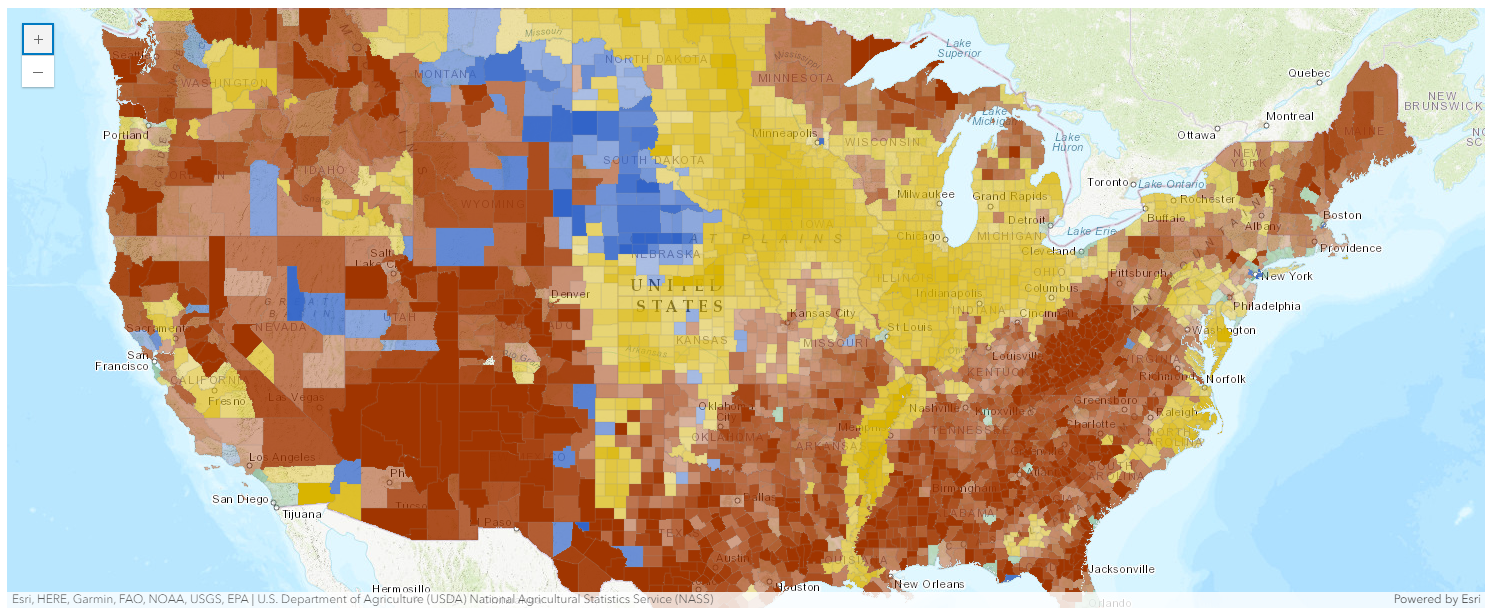

## Conclusion
When you style a layer, the styling options offered depend on the type of features you are mapping (point, line, or polygon) as well as the type of data attributes (numbers, categories, dates, and so on) and number of attributes you choose. Each style helps you tell a slightly different story and answer different questions with your data. Samples shown here are meant to give you basic ideas of how built-in renderer types like Class Breaks Renderers or Unique Value Renderers are being used, or when you need to customize your styles, how to direct Python in allowing the Javascript API to attempt to infer the renderer by some of the Javascript API rules.

Now that we have mastered some basic styles of visualizing numeric or orderable data, let's move on to the second half of the topic (`advanced-cartography-part2.ipynb`) for guides on how to style your map based on categorical data.